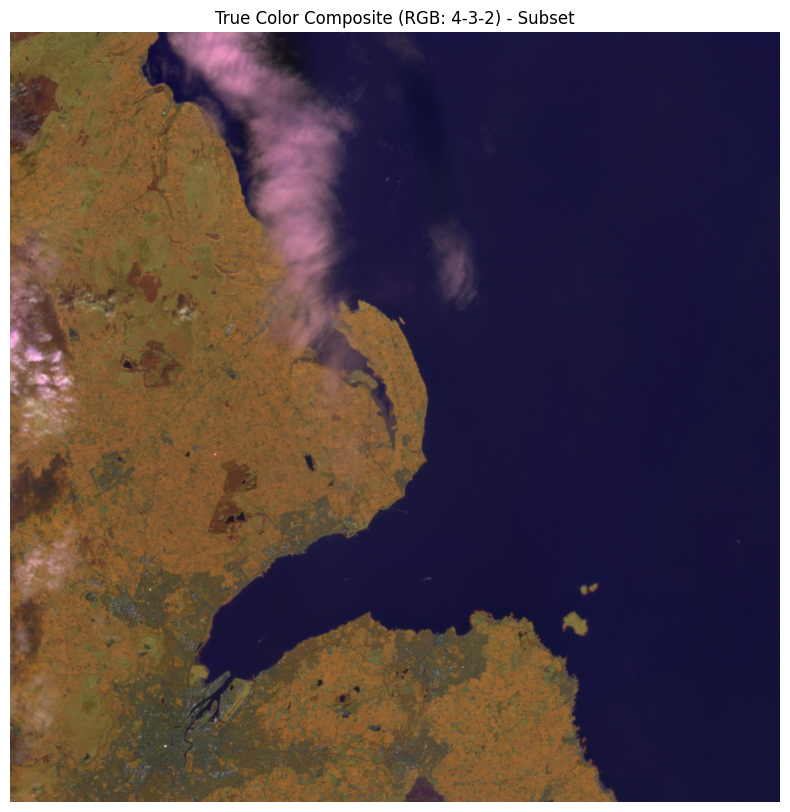

In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your stacked Sentinel-2 GeoTIFF file
stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'


try:
    # Open the stacked Sentinel-2 image
    with rasterio.open(stacked_image_path) as src:
        # Get image dimensions
        width = src.width
        height = src.height

        # Define a window (e.g., use the entire image or a subset)
        window_width = min(width, 5000)  # Adjust as needed
        window_height = min(height, 5000) # Adjust as needed
        window = rasterio.windows.Window(0, 0, window_width, window_height)

        # Read only this window from RGB bands
        B2 = src.read(2, window=window)  # Blue - Band 2
        B3 = src.read(3, window=window)  # Green - Band 3
        B4 = src.read(4, window=window)  # Red - Band 4

    # Normalize for display
    def normalize(band):
        band_min, band_max = np.min(band), np.max(band)
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    # Stack the RGB bands
    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Gamma correction
    gamma = 2.2
    rgb_image = np.power(rgb_image, 1/gamma)

    # Plot the True Color Composite
    plt.figure(figsize=(10, 10))  # Increased figure size
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Subset")
    plt.axis("off")
    plt.show()

except rasterio.RasterioIOError as e:
    print(f"Error opening the image file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [6]:
import rasterio

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'  # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")
        print(f"Metadata Example: {src.tags(1)}")
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
Metadata Example: {}


In [7]:
import rasterio

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2' # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")

        for i in range(1, src.count + 1):  # Iterate through each band
            band_data = src.read(i) #Read data
            print(f"--- Band {i} ---")
            print(f"  Min: {np.min(band_data)}, Max: {np.max(band_data)}, Mean: {np.mean(band_data)}")
            print(f"  Metadata: {src.tags(i)}")  # Print band-specific metadata
            
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
--- Band 1 ---
  Min: 0, Max: 18130, Mean: 1546.7032768554186
  Metadata: {}
--- Band 2 ---
  Min: 764, Max: 19872, Mean: 1349.4444579065762
  Metadata: {}
--- Band 3 ---
  Min: 1014, Max: 16188, Mean: 1687.859824768332
  Metadata: {}
--- Band 4 ---
  Min: 844, Max: 16648, Mean: 2132.4668172302017
  Metadata: {}
--- Band 5 ---
  Min: 0, Max: 19234, Mean: 1442.9184944807748
  Metadata: {}
--- Band 6 ---
  Min: 0, Max: 16837, Mean: 2119.7047897402463
  Metadata: {}
--- Band 7 ---
  Min: 983, Max: 16096, Mean: 1411.0503424922279
  Metadata: {}
--- Band 8 ---
  Min: 788, Max: 16959, Mean: 2011.0917723647235
  Metadata: {}
--- Band 9 ---
  Min: 860, Max: 16793, Mean: 2128.9343784111534
  Metadata: {}
--- Band 10 ---
  Min: 0, Max: 17413, Mean: 1361.1484991008656
  Metadata: {}
--- Band 11 ---
  Min: 846, Max: 17059, Mean: 1915.18440555

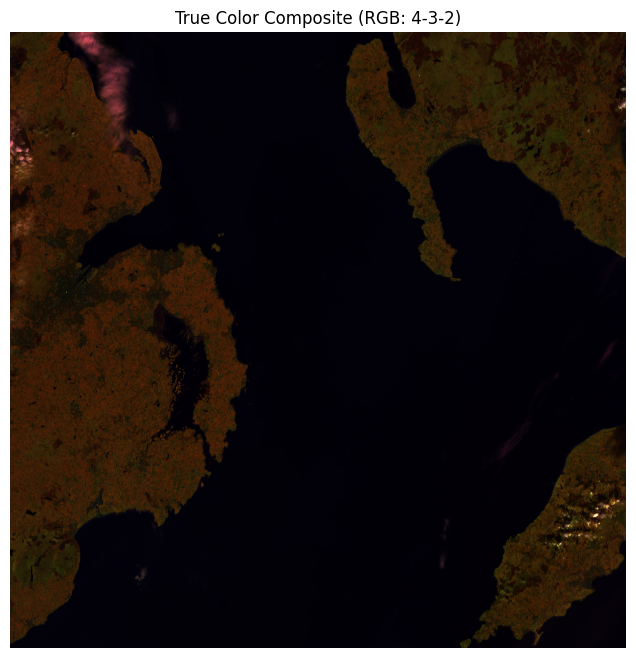

In [15]:
import matplotlib.pyplot as plt

with rasterio.open(stacked_image_path) as src:
    # Read an RGB combination (B4-B3-B2)
    B4, B3, B2 = src.read(4), src.read(3), src.read(2)

    # Normalize function for visualization
    def normalize(band):
        return (band - band.min()) / (band.max() - band.min() + 1e-6)

    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2)")
    plt.axis("off")
    plt.show()


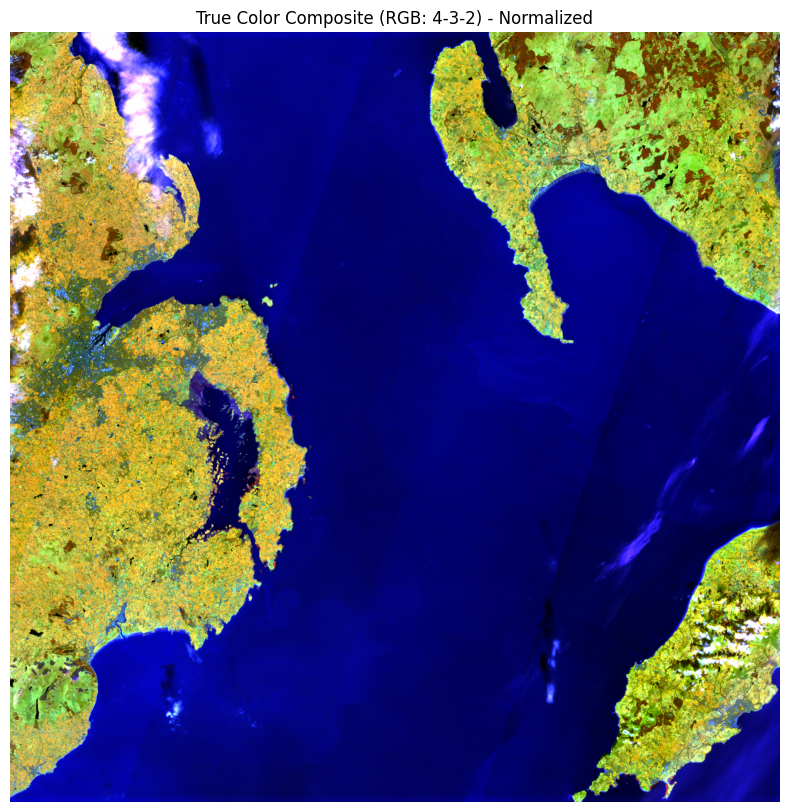

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'

with rasterio.open(stacked_image_path$) as src:
    # Read RGB bands (4-3-2)
    B4, B3, B2 = src.read(4), src.read(3), src.read(2)

    # Function to normalize using percentile stretch
    def normalize_band(band):
        min_val, max_val = np.percentile(band, (2, 98))  # Stretch between 2nd and 98th percentiles
        band = np.clip(band, min_val, max_val)
        return (band - min_val) / (max_val - min_val + 1e-6)

    # Apply normalization
    rgb_image = np.stack([normalize_band(B4), normalize_band(B3), normalize_band(B2)], axis=-1)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Normalized")
    plt.axis("off")
    plt.show()


In [23]:
import rasterio
import numpy as np
import os
from rasterio.windows import Window

# Path to stacked Sentinel-2 image
stacked_image_path = r"C:\Users\wasif\Desktop\stacked_images\Image_35_stacked.jp2"

# Define the output directory for cropped images
crop_output_dir = r"C:\Users\wasif\Desktop\cropped_images"
os.makedirs(crop_output_dir, exist_ok=True)

# Crop size
CROP_SIZE = 256
MAX_CROPS = 100  # Target number of balanced crops

# Open the stacked image
with rasterio.open(stacked_image_path) as src:
    height, width = src.height, src.width
    transform = src.transform
    crs = src.crs
    
    land_crops = []
    water_crops = []
    mixed_crops = []
    crop_count = 0  # Track number of saved crops

    for row in range(0, height, CROP_SIZE):
        for col in range(0, width, CROP_SIZE):
            if row + CROP_SIZE <= height and col + CROP_SIZE <= width:
                window = Window(col, row, CROP_SIZE, CROP_SIZE)
                crop = src.read(window=window)  # Read all bands

                # Extract bands for NDWI calculation
                B3 = crop[2]  # Green band
                B8 = crop[7]  # NIR band
                
                # Compute NDWI
                ndwi = (B3 - B8) / (B3 + B8 + 1e-6)
                avg_ndwi = np.mean(ndwi)
                
                # Classify crop based on NDWI threshold
                water_ratio = np.sum(ndwi > 0.1) / ndwi.size
                land_ratio = np.sum(ndwi < -0.1) / ndwi.size

                if water_ratio > 0.7:
                    water_crops.append((col, row, crop))  # More water
                elif land_ratio > 0.7:
                    land_crops.append((col, row, crop))  # More land
                else:
                    mixed_crops.append((col, row, crop))  # Mixed land & water
                
                # Stop when we have enough crops
                if len(mixed_crops) >= 40 and len(land_crops) >= 30 and len(water_crops) >= 30:
                    break
        if len(mixed_crops) >= 40 and len(land_crops) >= 30 and len(water_crops) >= 30:
            break

    # Combine selected crops
    selected_crops = mixed_crops[:40] + land_crops[:30] + water_crops[:30]

    # Save the crops
    for crop_count, (col, row, crop) in enumerate(selected_crops):
        # Convert pixel coordinates to geolocation (UTM)
        utmx, utmy = rasterio.transform.xy(transform, row + CROP_SIZE // 2, col + CROP_SIZE // 2)
        
        # Define output filename
        crop_filename = f"crop_{crop_count}_x{col}_y{row}_utm{int(utmx)}_{int(utmy)}.jp2"
        crop_path = os.path.join(crop_output_dir, crop_filename)

        # Save the crop as a `.jp2` file
        with rasterio.open(
            crop_path, "w",
            driver="JP2OpenJPEG",
            height=CROP_SIZE,
            width=CROP_SIZE,
            count=src.count,  # Number of bands
            dtype=crop.dtype,
            crs=crs,
            transform=rasterio.windows.transform(window, transform),
        ) as dst:
            dst.write(crop)

        print(f"Saved crop: {crop_path}")

    print("✅ 100 balanced crops extracted (40 mixed, 30 land, 30 water).")


Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_0_x256_y0_utm303845_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_1_x1536_y0_utm316645_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_2_x1792_y0_utm319205_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_3_x2304_y0_utm324325_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_4_x2560_y0_utm326885_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_5_x4096_y0_utm342245_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_6_x4352_y0_utm344805_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_7_x4608_y0_utm347365_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_8_x4864_y0_utm349925_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_9_x5888_y0_utm360165_6098735.jp2
Saved crop: C:\Users\wasif\Desktop\cropped_images\crop_10_x6144_y0_utm362725_6098735.jp2
Saved crop: C:\Users\wasif\Deskt

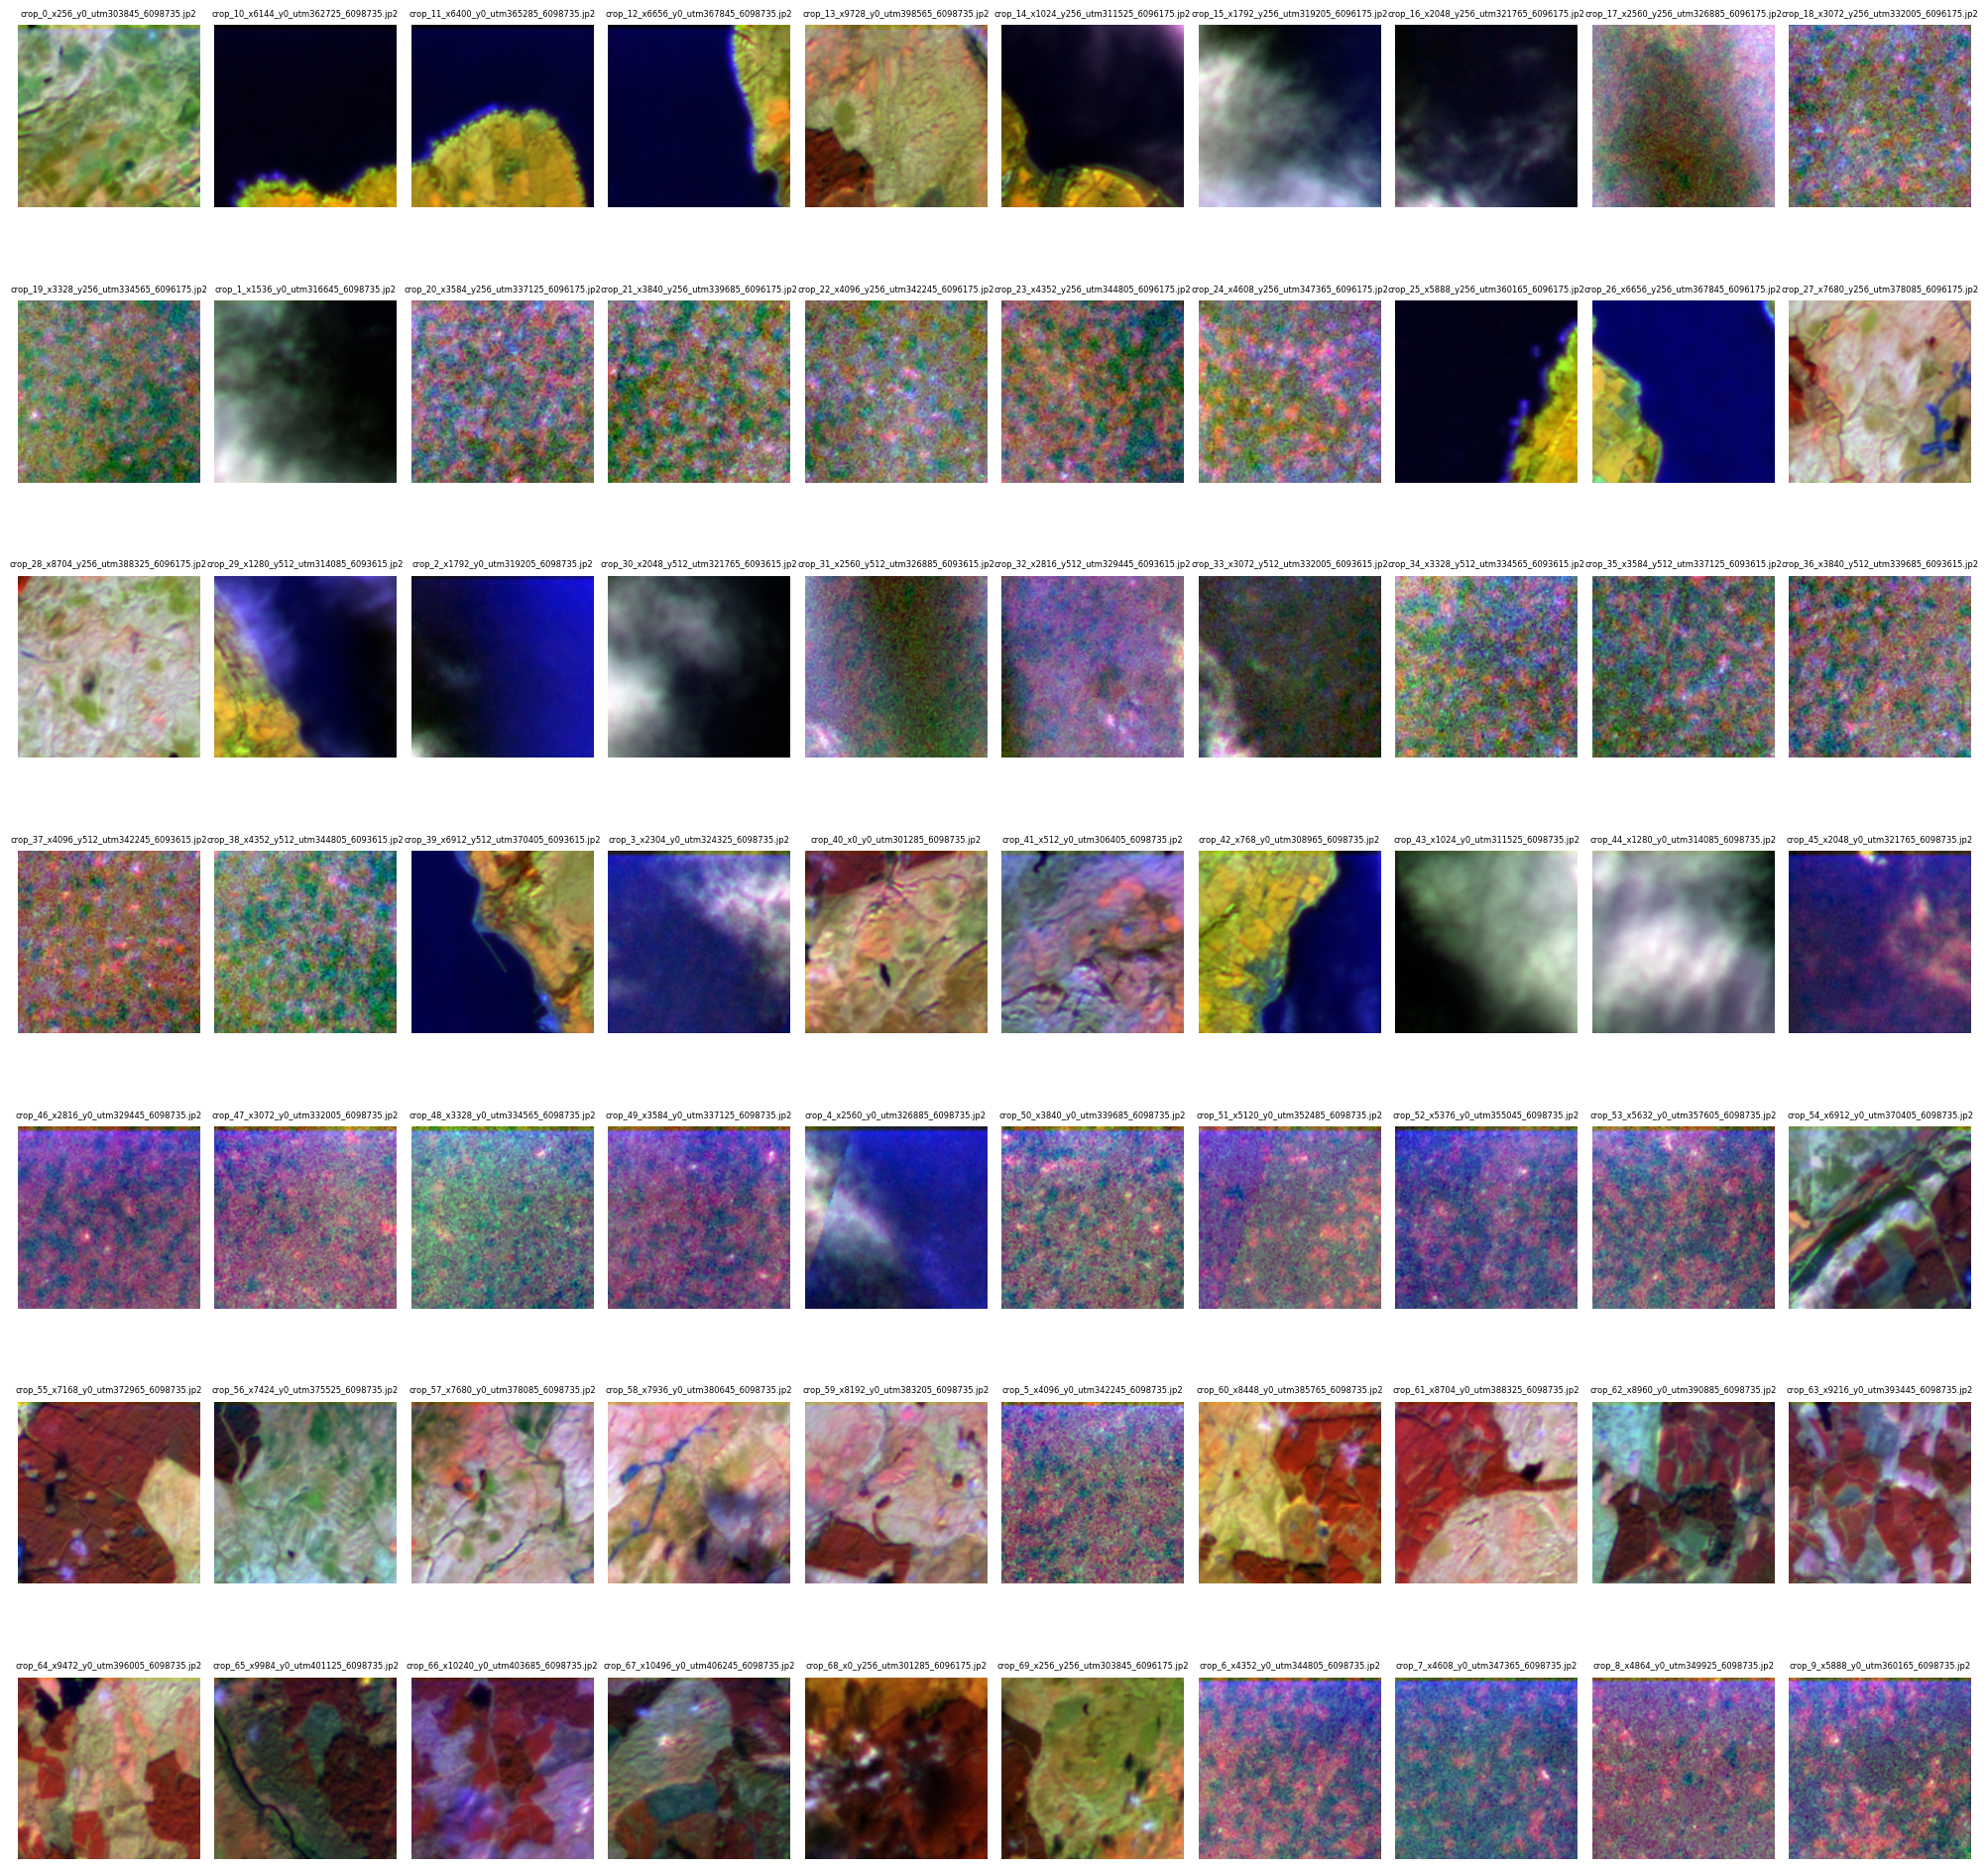

In [25]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory containing the cropped images
crop_output_dir = r"C:\Users\wasif\Desktop\cropped_images"

# List all `.jp2` files
crop_files = [os.path.join(crop_output_dir, f) for f in os.listdir(crop_output_dir) if f.endswith(".jp2")]

# Limit to the first 100 images for visualization
crop_files = crop_files[:100]

# Define the grid size for visualization (10x10)
grid_size = (7,10 )

# Create a figure
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))

# Function to normalize bands for display
def normalize(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band) + 1e-6)

# Loop through each image and display it
for i, crop_file in enumerate(crop_files):
    with rasterio.open(crop_file) as src:
        # Read RGB bands (4-3-2)
        B4, B3, B2 = src.read(4), src.read(3), src.read(2)
        
        # Normalize the bands
        rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)
        
        # Plot the image
        ax = axes[i // grid_size[1], i % grid_size[1]]
        ax.imshow(rgb_image)
        ax.set_title(os.path.basename(crop_file), fontsize=6)
        ax.axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()
